## Set Up 

In [1]:
from pythonosc import dispatcher, osc_server
from pythonosc.udp_client import SimpleUDPClient
import time

from bitalino import BITalino
import biofeatures

In [2]:
bitalino_ip = '192.168.0.101'
bitalino_port = 31000

actuator_ip = '192.168.0.100'
actuator_port = 12000

osc_client = SimpleUDPClient(actuator_ip, actuator_port) 


In [3]:
def process_riot_data(unused_addr, *values):
    global resp_data, last_update, client, inflated, inflating, deflating
        
    new_data = values[12]
    resp_data.append(new_data)
        
    if len(resp_data) > 200*10 and time.time() - last_update > update_freq:
        last_int, breathe_in = biofeatures.resp_intervals(resp_data, sampling_rate = 200, last_breath = True)
                
        if breathe_in:
            print("Breathing in")
            client.send_message("/actuator/inflate", 100.0)
            inflating = True
            deflating = False
        else:
            print("Breathing out")
            client.send_message("/actuator/inflate", -100.0)
            deflating = True
            inflating = False
        
        last_update = time.time()
    
    # only save the last 5 min of data
    if len(resp_data) > 200 * 60 * 5:
        resp_data = resp_data[-200*60*5:]

In [4]:
def handle_pressure(unused_addr, pressure):
    global client, inflated, inflating, deflating, stop_flag, pressure_readings, pressure_readings_wearable, t0, wearable
    print(pressure)
    
    if time.time() - t0 > 30:
        stop_flag = False
        wearable = False
        t0 = time.time()
    
    if stop_flag:
        if wearable:
            pressure_readings_wearable.append(pressure)
        else:
            pressure_readings.append(pressure)
        return
    
    if pressure < 800:
        print("Fully deflated!")
        client.send_message("/actuator/inflate", 0.0)
        deflating = False
    
    elif deflating and pressure > 1000:
        print("Squeeze!")
        
    elif pressure > 1150:
        print("Careful!")
        client.send_message("/actuator/inflate", 0.0)
        t0 = time.time()
        stop_flag = True
       # deflating = True
        
    elif not deflating:
        client.send_message("/actuator/inflate", 70.0)

In [5]:
import pythonosc
import time

dispatcher2 = pythonosc.dispatcher.Dispatcher()
dispatcher2.map("/sensor/pressure", handle_pressure)

client = SimpleUDPClient(actuator_ip, actuator_port) 

inflated = False
inflating = False
deflating = False
stop_flag = False

pressure_readings_wearable = []
pressure_readings = []
wearable = True
t0 = time.time()

server = osc_server.ThreadingOSCUDPServer((bitalino_ip, bitalino_port), dispatcher2)
print("Serving on {}".format(server.server_address))
server.serve_forever()

Serving on ('192.168.0.101', 31000)
1029.7313232421875
1029.871337890625
1042.6334228515625
1072.517822265625
1072.9322509765625
1066.05908203125
1070.0159912109375
1075.80859375
1074.6732177734375
1069.4910888671875
1073.4776611328125
1079.0081787109375
1078.5517578125
1072.5494384765625
1076.8997802734375
1082.7587890625
1080.748046875
1074.8040771484375
1082.1650390625
1085.326416015625
1083.3231201171875
1081.6016845703125
1088.9788818359375
1090.183349609375
1085.83056640625
1092.3472900390625
1094.2293701171875
1088.7969970703125
1093.946533203125
1098.3531494140625
1093.0625
1095.6416015625
1100.6995849609375
1097.809814453125
1095.775390625
1102.6822509765625
1100.2384033203125
1096.6998291015625
1105.947265625
1102.80224609375
1098.733154296875
1108.9573974609375
1109.92919921875
1102.2755126953125
1112.6314697265625
1111.832275390625
1109.85400390625
1119.5228271484375
1115.1395263671875
1118.8228759765625
1126.5543212890625
1120.7806396484375
1130.750732421875
1129.126586914

1075.3017578125
1075.862060546875
1076.3424072265625
1077.3331298828125
1077.587646484375
1077.9937744140625
1078.2159423828125
1078.3663330078125
1078.1605224609375
1077.5504150390625
1076.9259033203125
1076.1585693359375
1074.84326171875
1073.598388671875
1072.2791748046875
1071.3656005859375
1070.4747314453125
1069.6219482421875
1068.7896728515625
1068.2197265625
1067.643798828125
1067.2034912109375
1066.8634033203125
1066.41845703125
1066.0606689453125
1065.7679443359375
1065.414306640625
1065.2183837890625
1065.044677734375
1064.74853515625
1064.267333984375
1063.9783935546875
1063.749755859375
1063.5709228515625
1063.355224609375
1063.2451171875
1063.3460693359375
1063.4456787109375
1063.713134765625
1064.0546875
1064.6805419921875
1065.12158203125
1065.5257568359375
1065.9620361328125
1066.2984619140625
1066.7847900390625
1067.1761474609375
1067.27783203125
1067.693359375
1067.8583984375
1068.3546142578125
1068.57666015625
1069.0638427734375
1069.34326171875
1069.7181396484375
1

1076.364013671875
1076.3616943359375
1076.1689453125
1076.0904541015625
1076.85693359375
1076.044677734375
1075.8228759765625
1075.7685546875
1075.680908203125
1075.5234375
1075.5784912109375
1075.5032958984375
1075.3050537109375
1075.2008056640625
1075.119873046875
1075.087646484375
1075.111083984375
1074.890380859375
1074.869140625
1074.647216796875
1074.703369140625
1074.6075439453125
1074.5147705078125
1074.52001953125
1074.3809814453125
1074.323974609375
1074.225341796875
1074.1632080078125
1074.013916015625
1074.0145263671875
1073.74853515625
1073.6871337890625
1073.681640625
1073.5970458984375
1073.316650390625
1073.239013671875
1073.146484375
1073.0181884765625
1073.0108642578125
1072.971435546875
1072.918701171875
1072.8145751953125
1072.6279296875
1072.5994873046875
1072.6279296875
1072.5218505859375
1072.3968505859375
1072.34619140625
1072.2879638671875
1072.2974853515625
1072.176513671875
1072.1317138671875
1072.0465087890625
1072.04443359375
1071.8382568359375
1071.8507080

1050.27783203125
1050.2777099609375
1050.2049560546875
1050.85498046875
1050.1700439453125
1050.103759765625
1050.059326171875
1049.9854736328125
1049.976318359375
1050.0418701171875
1050.0238037109375
1049.9288330078125
1049.783447265625
1049.8206787109375
1049.8095703125
1049.8267822265625
1049.7476806640625
1049.6383056640625
1049.6087646484375
1049.6124267578125
1049.56103515625
1049.515625
1049.5635986328125
1049.445556640625
1049.467041015625
1049.3450927734375
1049.21044921875
1049.297607421875
1049.359375
1049.1708984375
1049.18896484375
1049.1265869140625
1049.013916015625
1049.0670166015625
1049.0321044921875
1048.959228515625
1048.9752197265625
1048.997314453125
1048.84521484375
1048.9141845703125
1048.870849609375
1048.77978515625
1048.688720703125
1048.803466796875
1048.6943359375
1048.63134765625
1048.51953125
1048.602783203125
1048.56201171875
1048.463134765625
1048.3662109375
1048.351318359375
1048.41552734375
1048.28955078125
1048.3416748046875
1048.3453369140625
1048.

KeyboardInterrupt: 

In [ ]:
client = SimpleUDPClient(actuator_ip, actuator_port) 

client.send_message("/actuator/inflate", 0.0)

In [13]:
client = SimpleUDPClient('192.168.0.101', 32000) 

client.send_message("/actuator/1/inflate", 0.0)

In [1]:
# deflating: 970
# deflating when empty: <800
# neutral empty: 1016
# neutral full: 1050 going down slowly to 1020
# inflating: 1068-1200
# squeezed: 1050 - 1200


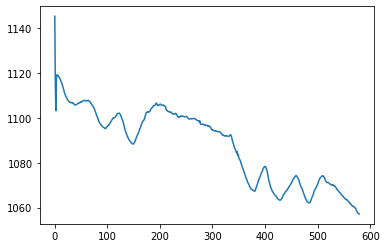

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pressure_readings_wearable)

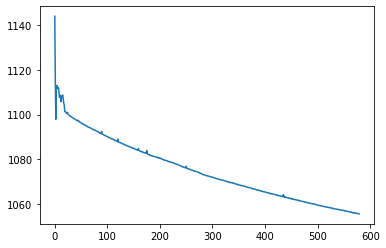

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pressure_readings)

In [8]:
import numpy as np

readings = np.array(pressure_readings_wearable) - np.array(pressure_readings)

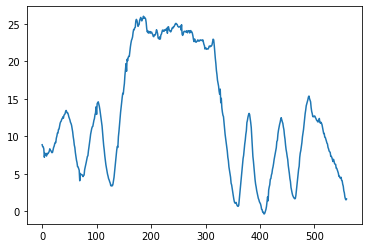

In [9]:
plt.plot(readings[20:])